In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from time import time
from datetime import date
from datetime import timedelta


from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression



from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import math as mat
from scipy import stats
from scipy.stats import norm
import scipy.stats as s
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab


from sklearn.neighbors import KNeighborsRegressor


import seaborn as sns

In [2]:
stock_indexes = pd.read_excel(r"C:\Users\maciej.baginski\Desktop\Podyplomowe Big Data\Seminarium\Projekt dolar\Indeksy.xlsx")
stock_indexes.set_index('Date',inplace = True)
stock_indexes.tail(10)

,Dolar Index,S&P Industrial,S&P Energy,MSCI Europe Index,10yearUSBond,Gold,MSCI Emerging Markets
Date,,,,,,,
2019-12-17,96.777,816.88,612.67,139.32,1.875,1476.160,1106.8
2019-12-18,96.963,812.81,614.66,139.18,1.919,1475.480,1113.0
2019-12-19,96.955,815.14,614.51,139.43,1.922,1478.750,1113.1
2019-12-20,97.274,819.85,619.94,140.53,1.919,1477.580,1114.9
2019-12-23,97.235,825.05,626.64,140.50,1.928,1485.770,1116.4
2019-12-24,97.251,822.24,626.44,140.70,1.903,1499.560,1114.5
2019-12-26,97.115,824.15,626.46,140.70,1.896,1511.290,1122.6
2019-12-27,96.546,823.84,623.39,140.85,1.877,1510.860,1125.9
2019-12-30,96.407,819.15,621.29,139.66,1.884,1515.120,1117.1


In [3]:
date_id = pd.DataFrame()
date_id['year'] = [stock_indexes.index[i].year for i in range(len(stock_indexes))]
date_id['month'] = [stock_indexes.index[i].month for i in range(len(stock_indexes))]
date_id['day'] = [stock_indexes.index[i].day for i in range(len(stock_indexes))]
stock_indexes['Index'] = date_id.index
stock_indexes.tail(10)

,Dolar Index,S&P Industrial,S&P Energy,MSCI Europe Index,10yearUSBond,Gold,MSCI Emerging Markets,Index
Date,,,,,,,,
2019-12-17,96.777,816.88,612.67,139.32,1.875,1476.160,1106.8,2062
2019-12-18,96.963,812.81,614.66,139.18,1.919,1475.480,1113.0,2063
2019-12-19,96.955,815.14,614.51,139.43,1.922,1478.750,1113.1,2064
2019-12-20,97.274,819.85,619.94,140.53,1.919,1477.580,1114.9,2065
2019-12-23,97.235,825.05,626.64,140.50,1.928,1485.770,1116.4,2066
2019-12-24,97.251,822.24,626.44,140.70,1.903,1499.560,1114.5,2067
2019-12-26,97.115,824.15,626.46,140.70,1.896,1511.290,1122.6,2068
2019-12-27,96.546,823.84,623.39,140.85,1.877,1510.860,1125.9,2069
2019-12-30,96.407,819.15,621.29,139.66,1.884,1515.120,1117.1,2070


In [4]:
date_id = np.array(stock_indexes['Index'], dtype=float)
date_id = np.linspace(1, max(date_id), len(stock_indexes))
dolar_index = stock_indexes['Dolar Index']

#### 4 letnie stopy zwrotu z indeksów

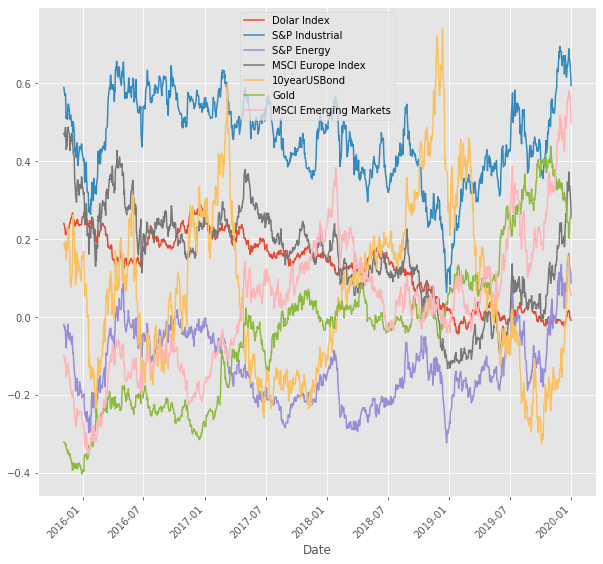

In [184]:
# stock_indexes.iloc[:,1:7].plot(rot=45)
rete = stock_indexes.pct_change(periods = 1000)
rete.plot(rot=45)
plt.gcf().set_size_inches(10,10)

#### Korelacje między stopami zwrotu

In [187]:
retscomp = stock_indexes.pct_change(250)
corr = retscomp.corr()
corr

,Dolar Index,S&P Industrial,S&P Energy,MSCI Europe Index,10yearUSBond,Gold,MSCI Emerging Markets,Index
Dolar Index,1.000000,-0.393037,-0.403916,0.209952,-0.345126,-0.259956,-0.443950,-0.044057
S&P Industrial,-0.393037,1.000000,0.779515,0.644563,0.555219,-0.262969,0.646721,0.007351
S&P Energy,-0.403916,0.779515,1.000000,0.357605,0.562102,-0.232378,0.483360,0.045788
MSCI Europe Index,0.209952,0.644563,0.357605,1.000000,0.284312,-0.414500,0.440841,0.075011
10yearUSBond,-0.345126,0.555219,0.562102,0.284312,1.000000,-0.638342,0.187330,-0.017891
Gold,-0.259956,-0.262969,-0.232378,-0.414500,-0.638342,1.000000,0.283724,-0.021566
MSCI Emerging Markets,-0.443950,0.646721,0.483360,0.440841,0.187330,0.283724,1.000000,0.037086
Index,-0.044057,0.007351,0.045788,0.075011,-0.017891,-0.021566,0.037086,1.000000


#### Średnia krocząca

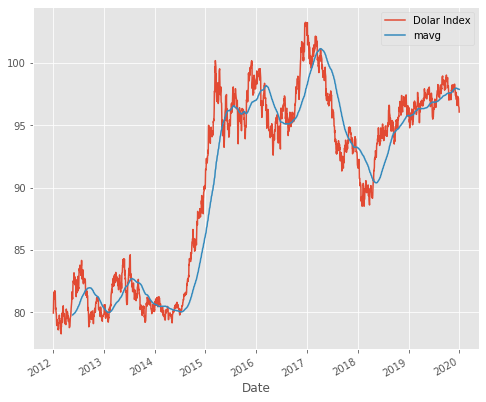

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

dolar_index.plot(label='Dolar Index')
mavg = dolar_index.rolling(window=100).mean()
mavg.plot(label='mavg')
plt.legend()

##### Miesięczna stopa zwrotu

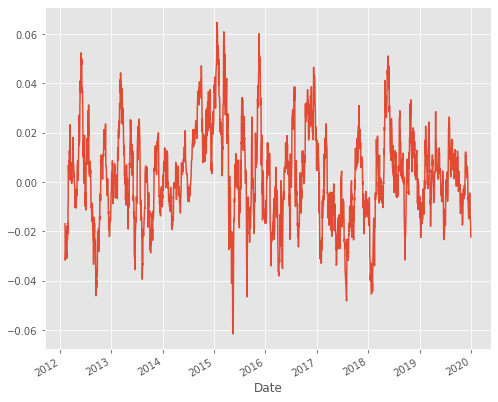

In [162]:
rets = dolar_index / dolar_index.shift(25)-1
rets.plot(label='return')

##### Wykres korelacji między posczególnymi indeksami, oraz KDE  to wygładzenia danych

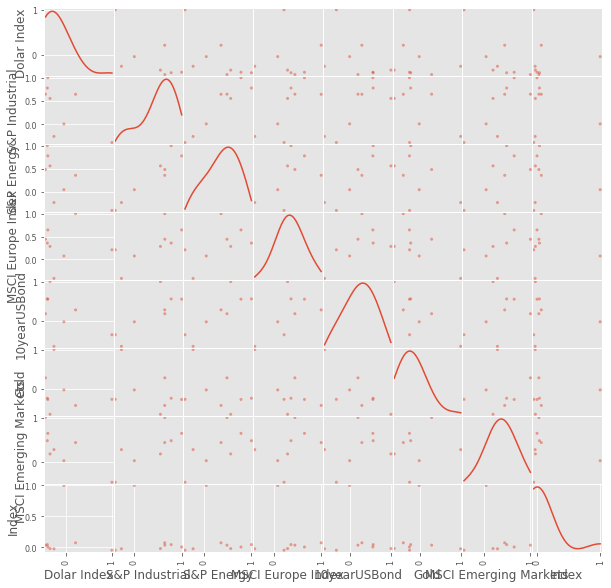

In [188]:
pd.plotting.scatter_matrix(corr, diagonal='kde', figsize=(10,10));

##### Wizualizacja heat mapy

([<matplotlib.axis.YTick at 0x250e5e5b248>,
 <a list of 8 Text yticklabel objects>)

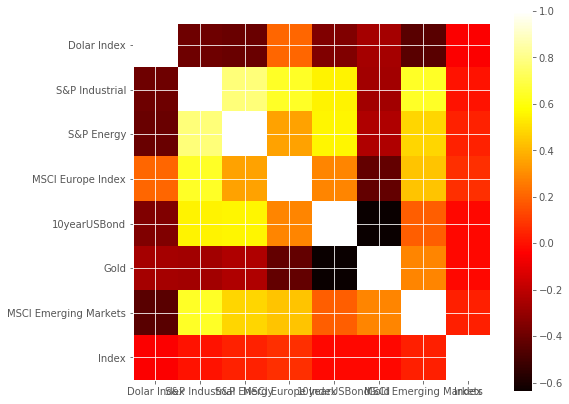

In [189]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

##### Na podstawie powyższej korelacji wybrałem: S&P energy, industrial, Gold, MSCI EM, 10yearUSBond, 

In [190]:
X = stock_indexes.iloc[:,[1,2,4,5,6]]
y = stock_indexes.iloc[:,0]

##### Przechodzimy do estymacji

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [192]:
# Linia Regresji
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Aproksymacja wielomianowa stopnia 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Aproksymacja wielomianowa stopnia 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)



C:\Users\maciej.baginski\Anaconda3\envs\uczenie_maszynowe\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.0479e-22): result may not be accurate.
  overwrite_a=True).T


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [193]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)

The linear regression confidence is  0.8781462426053545
The quadratic regression 2 confidence is  0.944816976973242
The quadratic regression 3 confidence is  0.9686907698736132
The knn regression confidence is  0.9873473193943288


In [194]:
predictions = clfknn.predict(X)
stock_indexes['Pred_dollar'] = predictions
stock_indexes

,Dolar Index,S&P Industrial,S&P Energy,MSCI Europe Index,10yearUSBond,Gold,MSCI Emerging Markets,Index,Pred_dollar
Date,,,,,,,,,
2012-01-03,79.940,345.05,713.00,87.16,1.960,1603.880,948.1,0,80.1650
2012-01-04,80.390,346.66,714.71,86.70,1.993,1611.730,941.6,1,80.8450
2012-01-05,81.240,346.69,710.40,85.94,1.993,1621.430,937.7,2,81.2700
2012-01-06,81.620,346.24,706.98,85.94,1.961,1617.550,926.1,3,81.4600
2012-01-09,81.300,348.85,710.64,85.59,1.960,1610.880,934.8,4,80.8450
...,...,...,...,...,...,...,...,...,...
2019-12-24,97.251,822.24,626.44,140.70,1.903,1499.560,1114.5,2067,97.2430
2019-12-26,97.115,824.15,626.46,140.70,1.896,1511.290,1122.6,2068,96.5865
2019-12-27,96.546,823.84,623.39,140.85,1.877,1510.860,1125.9,2069,96.5865


Text(0.5, 1.0, 'Dollar Index')

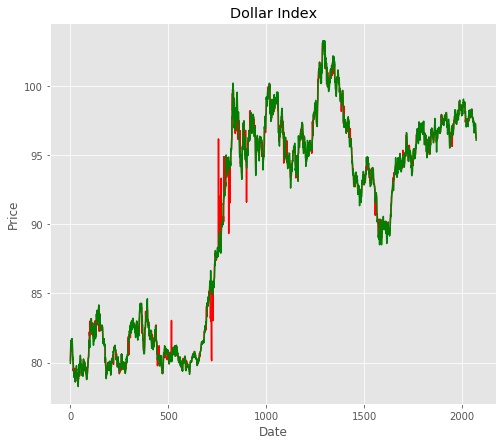

In [195]:
future_date = 100
date_id_pred = np.linspace(1, max(date_id)+future_date, len(stock_indexes)+future_date)

plt.plot(date_id, predictions, "r-")
plt.plot(date_id, dolar_index, "g-")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Dollar Index')

##### Przechodzimy do predykcji

In [196]:
stock_indexes_pred = pd.read_csv(r"C:\Users\maciej.baginski\Desktop\Podyplomowe Big Data\Seminarium\Projekt dolar\Indeksy do predykcji.csv",sep=";")
stock_indexes_pred.set_index('Data',inplace = True)
stock_indexes_pred

,Gold,S&P ENERGy,MSCI EM,10Y,Industrial,Dollar Index
Data,,,,,,
02.01.2020,1529.14,630.79,1143.1,1.877,834.23,96.525
03.01.2020,1549.02,628.71,1122.0,1.793,833.25,96.521
06.01.2020,1565.74,633.69,1119.0,1.809,833.03,96.350
07.01.2020,1574.26,632.67,1118.2,1.823,832.01,96.702
08.01.2020,1556.42,621.72,1123.7,1.875,833.91,96.996
...,...,...,...,...,...,...
26.05.2020,1711.13,410.03,920.2,0.697,668.13,98.906
27.05.2020,1709.40,414.93,923.3,0.690,690.47,99.058
28.05.2020,1718.64,402.85,917.3,0.695,683.71,98.372


In [198]:
X_pred = stock_indexes_pred.iloc[:,[0,1,2,3,4]]
predictions = clfknn.predict(X_pred)
stock_indexes_pred['Pred_dollar'] = predictions
stock_indexes_pred

,Gold,S&P ENERGy,MSCI EM,10Y,Industrial,Dollar Index,Pred_dollar
Data,,,,,,,
02.01.2020,1529.14,630.79,1143.1,1.877,834.23,96.525,94.980
03.01.2020,1549.02,628.71,1122.0,1.793,833.25,96.521,94.980
06.01.2020,1565.74,633.69,1119.0,1.809,833.03,96.350,94.980
07.01.2020,1574.26,632.67,1118.2,1.823,832.01,96.702,94.980
08.01.2020,1556.42,621.72,1123.7,1.875,833.91,96.996,94.980
...,...,...,...,...,...,...,...
26.05.2020,1711.13,410.03,920.2,0.697,668.13,98.906,95.273
27.05.2020,1709.40,414.93,923.3,0.690,690.47,99.058,95.273
28.05.2020,1718.64,402.85,917.3,0.695,683.71,98.372,95.273


Text(0.5, 1.0, 'Dollar Index')

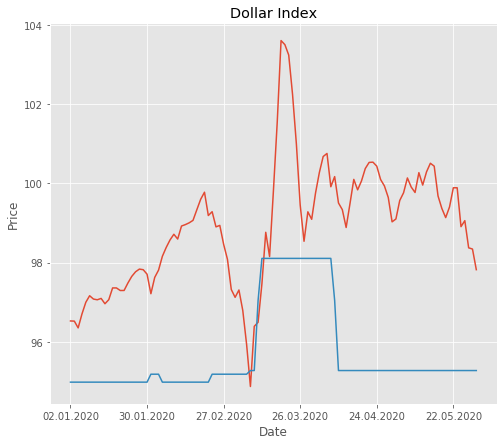

In [199]:
stock_indexes_pred['Dollar Index'].plot()
stock_indexes_pred['Pred_dollar'].plot()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Dollar Index')

##### Próba dopasowania sie z funkcją do wykresu dolara

Parametry modelu: [-1.75709236e-03  3.16862287e-03  1.01333379e-02  7.77954124e+01]


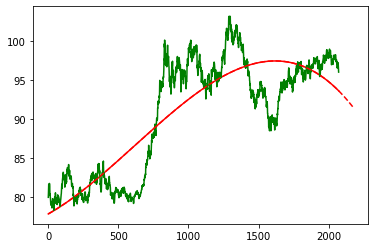

In [5]:
def pred_2 (x,a,b,c,d):
    return (a*x)**3 + (b*x)**2 + c*x+ d

init_guess = [1,1,0]

ans,cov = curve_fit(pred_2,date_id, dolar_index,maxfev=10000000)

print("Parametry modelu: %s"%ans)

future_date = 100
date_id_pred = np.linspace(1, max(date_id)+future_date, len(stock_indexes)+future_date)

plt.plot(date_id, pred_2(date_id, *ans), "r-")
plt.plot(date_id, dolar_index, "g-")
plt.plot(date_id_pred, pred_2(date_id_pred, *ans), 'r--')


Parametry modelu: [-1.75709236e-03  3.16862287e-03  1.01333379e-02  7.77954124e+01]


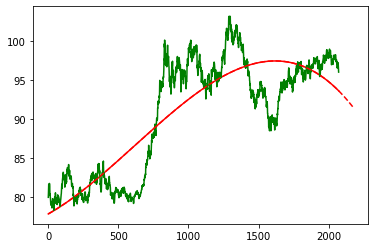

In [7]:
def RL (x,a,b):
    return a(x) + b



ans,cov = curve_fit(pred_2,date_id, dolar_index,maxfev=10000000)

print("Parametry modelu: %s"%ans)

future_date = 100
date_id_pred = np.linspace(1, max(date_id)+future_date, len(stock_indexes)+future_date)

plt.plot(date_id, pred_2(date_id, *ans), "r-")
plt.plot(date_id, dolar_index, "g-")
plt.plot(date_id_pred, pred_2(date_id_pred, *ans), 'r--')


C:\Users\maciej.baginski\Anaconda3\envs\uczenie_maszynowe\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
C:\Users\maciej.baginski\Anaconda3\envs\uczenie_maszynowe\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


Parametry modelu: [  80.8677245    19.08274855 1221.2323506    96.12242126 6389.94401111]


C:\Users\maciej.baginski\Anaconda3\envs\uczenie_maszynowe\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


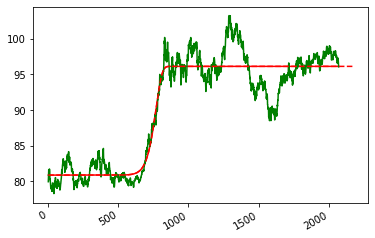

In [9]:
def rich (x, a, b, c, d, e):
    return ( ( (a-d) / ( (1+( (x/c)** b )) **e) ) + d )


init_guess = [0,0.6931471805599453,0.5,13.116083701447021,3]

ans,cov = curve_fit(rich,date_id, dolar_index,maxfev=10000000)

print("Parametry modelu: %s"%ans)

future_date = 100
date_id_pred = np.linspace(1, max(date_id)+future_date, len(stock_indexes)+future_date)

plt.plot(date_id, rich(date_id, *ans), "r-")
plt.plot(date_id, dolar_index, "g-")
plt.plot(date_id_pred, rich(date_id_pred, *ans), 'r--')

plt.gcf().autofmt_xdate()


14.544804240617005 * log ( 547.4942681005602 +x) -15.351087408547745


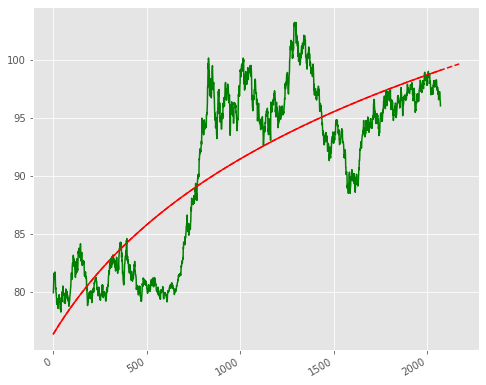

In [52]:
def log_norm (x,a,b,c):
    return a * np.log(b+x) + c

init_guess = [1,1,0]

fit = curve_fit(log_norm,date_id,dolar_index, 
                p0=init_guess)
ans,cov = fit
fit_a,fit_b,fit_c = ans
print(fit_a, "*","log (", fit_b,"+x)",  fit_c)



plt.plot(date_id, log_norm(date_id, *ans), "r-")
plt.plot(date_id, dolar_index, "g-")
plt.plot(date_id_pred, log_norm(date_id_pred, *ans), 'r--')

plt.gcf().autofmt_xdate()

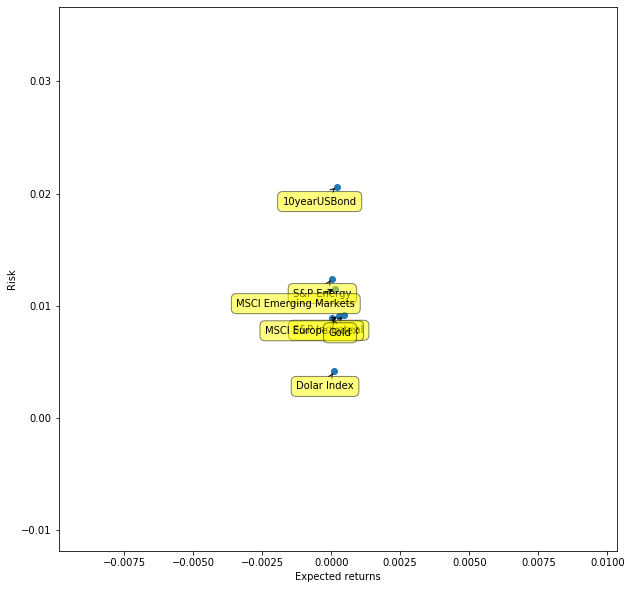

In [78]:
# plt.scatter(retscomp.mean(), retscomp.std())
# plt.xlabel('Expected returns')
# plt.ylabel('Risk')
# plt.gcf().set_size_inches(10,10)
# for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
#       plt.annotate(
#           label,
#           xy = (x,y), xytext = (20, -20),
#           textcoords = 'offset points', ha = 'right', va = 'bottom',
#           bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
#           arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))